In [22]:
import numpy as np
import cv2
import urllib
from matplotlib import pyplot as plt
from skimage import io

In [23]:
img1 = cv2.imread('images/orb_example_img1.png',0)# queryImage
img2 = cv2.imread('images/orb_example_img2.png',0) # trainImage

# Initiate ORB detector
orb = cv2.xfeatures2d.SIFT_create()

In [24]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [30]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)

In [34]:
import timeit
start = timeit.default_timer()

# Match descriptors.
matches = bf.match(des1,des2)

duration = timeit.default_timer() - start
print("time: "+str(duration)+"seconds")

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

time: 0.0744369029999seconds


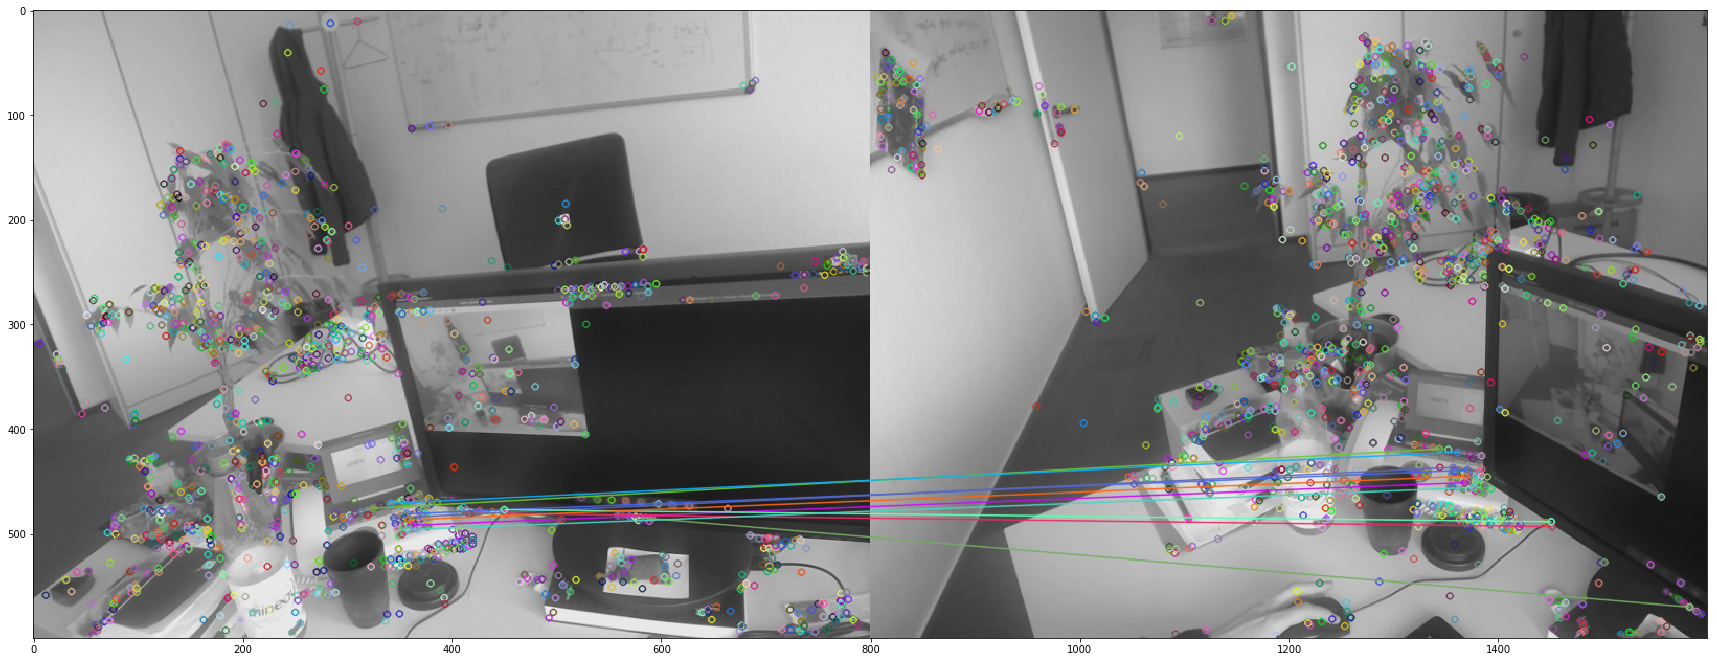

In [37]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None)
fig = plt.figure(figsize = (30,30))
iplot = fig.add_subplot(111)
iplot.imshow(img3)
plt.show()